In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

Dataset with label

In [3]:
SASS_with_label=pd.read_csv('../data/data_clean/SASS_99_00_T2_T3_S4A_S3A_S2A.csv', sep=',', header=0)
print('Labeled:', SASS_with_label.shape)

Labeled: (3640, 128)


Dataset with no label

In [4]:
SASS_no_label=pd.read_csv('../data/data_clean/SASS_no_label.csv', sep=',', header=0)
print('Unlabeled:',SASS_no_label.shape)

SASS_no_label.rename(columns={'T0054': 'FTPT_S', 'T0356': 'GENDER'}, inplace=True)
# X_all=SASS_no_label[columns].copy()
# X_all=X_all.astype(dtype)
# print('Labeled train set shape: {}'.format(X_all.shape))

Unlabeled: (33198, 124)


In [5]:
cols_old = ['CNTLNUM_T',
'SCHCNTL',
'F0195',
'F0196',
'F0197',
'FTPT_S',
'GENDER',
'AGE_T',
'RACETH_T',
'T0072',
'T0081',
'A0225',
'NEWTCH',
'RACETH_P',
'S0282',
'S0285',
'S0288',
'S0306',
'S0307',
'S0308',
'TOTEXPER',
'T0102',
'S1611',
'S1612',
'T0065',
'T0082',
'S1613',
'T0066',
'S1614',
'T0068',
'T0069',
'S1615',
'S1616',
'S1617',
'S1618',
'S1619',
'S1620',
'S1621',
'S1622',
'S1623',
'S1624',
'S1625',
'S1626',
'S1627',
'T0206',
'T0067',
'T0209',
'T0210',
'T0211',
'T0212',
'T0273',
'T0339',
'T0340',
'T0341',
'T0343',
'T0345',
'T0347',
'T0348',
'T0350',
'T0352',
'T0070',
'T0080',
'T0084',
'T0087',
'T0090',
'MINTCH',
'EARNALL',
'EARNSCH',
'T0093',
'T0104',
'STU_TCH',
'T0096',
'PGMTYPE',
'SCHLEVEL',
'MINENR',
'T0099',
'S0290',
'T0103',
'T0120',
'T0179',
'URBANIC',
'REGION',
'T0180',
'S0283',
'S0284',
'T0181',
'S0286',
'S0287',
'T0182',
'T0183',
'T0184',
'T0191',
'T0192',
'T0193',
'T0194',
'T0195',
'T0196',
'T0197',
'T0198',
'T0199',
'T0200',
'T0201',
'T0202',
'T0203',
'T0204',
'CNTLNUM_P',
'AGE_P',
'T0205',
'A0053',
'A0054',
'A0055',
'A0056',
'T0355',
'A0226',
'A0227',
'S0265',
'S0266',
'S0267',
'S0268',
'S0269',
'S0270',
'S0271',
'S0272',
'S0273',
'S0274',
'S0275',
'S0276']

cols_new = ['CNTLNUM_T',
'SCHCNTL',
'marital_status',
'num_dependents',
'dependents_age5',
'ft_pt_status',
'gender_T',
'age_T',
'race_T',
'BA_major',
'MA_major',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'total_tch_yr',
'field',
'incen_certification',
'incen_excellence',
'public_ft_exp',
'MA_grad_yr',
'incen_prof_dev',
'public_pt_exp',
'incen_location',
'private_ft_exp',
'private_pt_exp',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'class_org',
'private_exp',
'hrs_tch_ELA',
'hrs_tch_math',
'hrs_tch_social',
'hrs_tch_science',
'hrs_in_school_wk',
'would_be_tch',
'remain_teaching',
'summer_teaching',
'nonteaching_job',
'nonschool_job',
'base_salary',
'extracur_act',
'merit_pay',
'outside_pay',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'minority_teachers',
'earnings_total',
'earnings_school',
'deg_T_EdS',
'cert_type',
'stu_tch_ratio',
'deg_T_AdvGrad',
'sch_type',
'level',
'minority_students',
'deg_T_Phd',
'title1_receive_stu',
'cert_holder',
'field_same',
'pd_release_time',
'urbanicity',
'region',
'pd_schedule_time',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'pd_stipend',
'FRPL_approved_pk',
'FRPL_approved_k12',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'CNTLNUM_P',
'age_P',
'teaches_12th',
'yrs_P_this_sch',
'yrs_P_oth_schls',
'yrs_tch_before_P',
'yrs_tch_since_P',
'union_member',
'salary_P',
'gender_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

In [6]:
cols_cat= ['ft_pt_status',
'gender_T',
'age_T',
'race_T',
'BA_major',
'MA_major',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'field',
'incen_certification',
'incen_excellence',
'MA_grad_yr',
'incen_prof_dev',
'incen_location',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'class_org',
'private_exp',
'would_be_tch',
'remain_teaching',
'summer_teaching',
'nonteaching_job',
'nonschool_job',
'base_salary',
'extracur_act',
'merit_pay',
'outside_pay',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'minority_teachers',
'earnings_total',
'earnings_school',
'deg_T_EdS',
'cert_type',
'deg_T_AdvGrad',
'sch_type',
'level',
'minority_students',
'deg_T_Phd',
'title1_receive_stu',
'cert_holder',
'field_same',
'pd_release_time',
'urbanicity',
'region',
'pd_schedule_time',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'pd_stipend',
'FRPL_approved_pk',
'FRPL_approved_k12',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'age_P',
'teaches_12th',
'union_member',
'salary_P',
'gender_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

In [7]:
cols_value_change = ['new_teacher',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'incen_certification',
'incen_excellence',
'incen_prof_dev',
'incen_location',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'private_exp',
'deg_T_BA',
'deg_T_MA',
'cert_holder',
'field_same',
'pd_release_time',
'pd_schedule_time',
'pd_stipend',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'union_member']

# cols_dummies = ['ft_pt_status',
# 'gender_T',
# 'race_T',
# 'BA_major',
# 'MA_major',
# 'field',
# 'class_org',
# 'cert_type',
# 'sch_type',
# 'level',
# 'urbanicity',
# 'region',
# 'gender_P',
# 'deg_P',
# 'new_teacher',
# 'race_P',
# 'FRPL_eligible',
# 'NLP_participate',
# 'title1_receive',
# 'title1_reading',
# 'title1_math',
# 'title1_esl',
# 'incen_certification',
# 'incen_excellence',
# 'incen_prof_dev',
# 'incen_location',
# 'incen_reten',
# 'incen_reten_gen_elem',
# 'incen_reten_spec_ed',
# 'incen_reten_english',
# 'incen_reten_soc_studies',
# 'incen_reten_STEM_comp_sci',
# 'incen_reten_STEM_math',
# 'incen_reten_STEM_phys_sci',
# 'incen_reten_STEM_biology',
# 'incen_reten_esl',
# 'incen_reten_foreign_lang',
# 'incen_reten_music_art',
# 'incen_reten_voc_ed',
# 'private_exp',
# 'deg_T_BA',
# 'deg_T_MA',
# 'deg_T_AA',
# 'deg_T_BA2',
# 'deg_T_MA2',
# 'deg_T_EdS',
# 'deg_T_AdvGrad',
# 'deg_T_Phd',
# 'cert_holder',
# 'field_same',
# 'pd_release_time',
# 'pd_schedule_time',
# 'pd_stipend',
# 'pd_tuition_reimb',
# 'pd_conference_reimb',
# 'pd_travel_reimb',
# 'teaches_ungraded',
# 'teaches_pk',
# 'teaches_k',
# 'teaches_1st',
# 'teaches_2nd',
# 'teaches_3rd',
# 'teaches_4th',
# 'teaches_5th',
# 'teaches_6th',
# 'teaches_7th',
# 'teaches_8th',
# 'teaches_9th',
# 'teaches_10th',
# 'teaches_11th',
# 'teaches_12th',
# 'union_member']

# cols_dummies_ord = ['age_T',
# 'MA_grad_yr',
# 'would_be_tch',
# 'remain_teaching',
# 'base_salary',
# 'minority_teachers',
# 'earnings_total',
# 'earnings_school',
# 'minority_students',
# 'title1_receive_stu',
# 'FRPL_eligible_pk',
# 'FRPL_eligible_k12',
# 'FRPL_approved_pk',
# 'FRPL_approved_k12',
# 'age_P',
# 'salary_P',
# 'vacnc_gen_elem',
# 'vacnc_spec_ed',
# 'vacnc_english',
# 'vacnc_soc_st',
# 'vacnc_comp_sci',
# 'vacnc_math',
# 'vacnc_biology',
# 'vacnc_phys_sci',
# 'vacnc_esl',
# 'vacnc_foreign_lang',
# 'vacnc_music_art',
# 'vacnc_vo_tech']

In [8]:
# categorical_cols= ['vacnc_STEM',
#             'region_Northeast',
#             'region_West',
#             'race_T_White',
#             'race_T_Black',
#             'race_T_Hispanic',
#             'gender_T_Female',
#             'summer_teaching',
#             'nonteaching_job',
#             'nonschool_job',
#             'extracur_act',
#             'merit_pay',
#             'union_member',
#             'BA_major_STEM',
#             'MA_major_STEM',
#             'field_cert_Regular',
#             'deg_T_MA',
#             'pd_time',
#             'pd_finance',
#             'remain_teaching',
#             'field_STEM',
#             'field_same',
#             'full_time',
#             'teaches_7to12',
#             'new_teacher',
#             'sch_type',
#             'level_Elementary',
#             'urbanicity',
#             'title_I_receive',
#             'deg_highest_P',
#             'race_P_Black',
#             'race_P_White',
#             'race_P_Hispanic',
#             'gender_P_Female',
#             'incen_pay',
#             'incen_NonSTEM',
#             'class_org',
#             'teaches_ungraded']
# numerical_cols = [c for c in columns if c not in categorical_cols]
# categorical_cols_idx = [columns.index(c) for c in categorical_cols if c in columns]

# # dtype = {c: 'int' for c in categorical_cols}
# # X_label=X_label.astype(dtype)

In [9]:
SASS_with_label.rename(columns=dict(zip(cols_old, cols_new)), inplace=True)
SASS_no_label.rename(columns=dict(zip(cols_old, cols_new)), inplace=True)

**One-Hot Encoding for categorical features**

the dataframe has been encoded this ways:
- get_dummies for categorical columns (nominal and ordinal)

In [10]:
def encoding (df):
    
    #marked as 0 for valid skipped answers
    for c in df.columns:
        if (df[c]<0).any(): df[c]=df[c].apply(lambda x: 0 if x < 0 else int(x))
    
    #marked as 0 for any False answers
    for c in cols_value_change:
        df[c] = df[c].apply(lambda x: 0 if x != 1 else x)
    
    # df_temp = pd.get_dummies(df[cols_dummies], columns=cols_dummies)
    # for c in df_temp: categorical_cols.append(c)
    # df.drop(columns=cols_dummies, inplace=True)
    # df=pd.concat([df, df_temp], axis=1)
    
    # df_temp=pd.get_dummies(df[cols_dummies_ord], columns=cols_dummies_ord)
    # for c in df_temp: categorical_cols.append(c)
    # df.drop(columns=cols_dummies_ord, inplace=True)
    # df=pd.concat([df, df_temp], axis=1)
    df=df.astype({c: 'int' for c in cols_cat})
    
    return df

In [11]:
cols_na=[]

print("3 columns from TFS survey are not available for No Label data:")
for c in SASS_with_label.columns:
    if c not in SASS_no_label.columns.to_list() and c != 'label': 
        print(c)
        cols_na.append(c)

3 columns from TFS survey are not available for No Label data:
marital_status
num_dependents
dependents_age5


In [12]:
label = ['label']
cols_drop = ['CNTLNUM_T', 'SCHCNTL', 'CNTLNUM_P']

y=SASS_with_label[label].values.ravel()
columns = SASS_with_label.drop(columns=label + cols_drop + cols_na).columns.tolist()
X_label = encoding(SASS_with_label[columns].copy())
X_all = encoding(SASS_no_label.drop(columns=cols_drop).copy())

print('Labeled train set shape: {}'.format(X_label.shape))
print('Unlabeled test set shape: {}'.format(X_all.shape))

Labeled train set shape: (3640, 121)
Unlabeled test set shape: (33198, 121)


In [13]:
numerical_cols = [c for c in columns if c not in cols_cat]
categorical_cols_idx = [columns.index(c) for c in cols_cat if c in columns]
X_all=X_all.reindex(columns=X_label.columns)

**Normalization**

In [14]:
scaler = StandardScaler()
scaler.fit(X_label[numerical_cols])
X_label[numerical_cols] = scaler.transform(X_label[numerical_cols])
X_all[numerical_cols] = scaler.transform(X_all[numerical_cols])

In [15]:
#plotting confusion matrix
def ticks(x, position):
    if position == 1: return 'Former'
    elif position == 2: return 'Current'
    else: return x

### Best Grandient Boosting Model ###

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as mticker

Hyperparameter tuning for labeled data 

Training - no hyperparameter tuning

In [17]:
%%time
from catboost import CatBoostClassifier

estimator = CatBoostClassifier(random_seed=123, verbose=False, eval_metric="Logloss", 
                               one_hot_max_size=256)
                               
estimator.fit(X_label, y, cat_features=categorical_cols_idx)
print('Train Accuracy: {:0.4f}'.format(estimator.score(X_label, y)))

Train Accuracy: 0.9077
CPU times: user 7.34 s, sys: 1.23 s, total: 8.57 s
Wall time: 4.81 s


Training - with the best hyperparameters selected from [Task3_Modeling_GB_v2.ipynb](Task3_Modeling_GB_v2.ipynb)

### Teacher retention prediction on  unlabaled data ###

In [18]:
%%time
import lightgbm as lgb

params = {'random_strength': 0, 'min_data_in_leaf': 5, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 6}

fit_params = {'cat_features': categorical_cols_idx}

estimator = CatBoostClassifier(random_seed=123, verbose=False, eval_metric="Logloss", 
                               one_hot_max_size=256)                            
estimator.set_params(**params)
estimator.fit(X_label, y, **fit_params)
y_pred = estimator.predict(X_label)

print('Train Accuracy: {:0.4f}'.format(estimator.score(X_label, y)))

Train Accuracy: 0.8783
CPU times: user 947 ms, sys: 199 ms, total: 1.15 s
Wall time: 478 ms


Finding the best threshold incorpoating US Teacher attrition rate (10%)

In [24]:
for th in np.arange(0.2,0.3,0.01):
    pred_prob_all=estimator.predict_proba(X_all)
    pred_all=pred_prob_all[:, 1] > th
    pred_count_all=np.unique(pred_all, return_counts=True)
    attr_rate = pred_count_all[1][0]/pred_count_all[1].sum()*100
    print('Attrition rate for threshold {:0.2f} {:0.2f}%:'.format(th, attr_rate))
    
    if attr_rate > 10: 
        best_th=th
        print('Best threshold for the teacher attrition rate 10%: {:0.02f}'.format(best_th))
        break

Attrition rate for threshold 0.20 6.56%:
Attrition rate for threshold 0.21 7.08%:
Attrition rate for threshold 0.22 7.60%:
Attrition rate for threshold 0.23 8.11%:
Attrition rate for threshold 0.24 8.65%:
Attrition rate for threshold 0.25 9.13%:
Attrition rate for threshold 0.26 9.65%:
Attrition rate for threshold 0.27 10.25%:
Best threshold for the teacher attrition rate 10%: 0.27


Unlabeled data (33198, 121)

In [25]:
print('Assigning label 1 or True for Current Teachers depends on probability')

print('With threshold 5:5 :', np.unique(estimator.predict(X_all), return_counts=True))

pred_prob_all=estimator.predict_proba(X_all)
pred_all=pred_prob_all[:, 1] > best_th
pred_count_all=np.unique(pred_all, return_counts=True)
print('With threshold 1:9 :',pred_count_all)

Assigning label 1 or True for Current Teachers depends on probability
With threshold 5:5 : (array([0, 1]), array([ 9651, 23547]))
With threshold 1:9 : (array([False,  True]), array([ 3402, 29796]))


Creating dataframes with predicted labels

In [26]:
df_all=pd.DataFrame(SASS_no_label, columns=['SCHCNTL', 'CNTLNUM_T', 'CNTLNUM_P']+columns)
df_all['label_Current']=pred_all
df_all['label_Current']=df_all['label_Current'].apply(lambda x: 1 if x==True else 0)
print(df_all.shape)
print('Total number of schools: ',df_all.SCHCNTL.nunique())
print('Average number of teachers per school: {:0.2f}'
      .format(df_all.shape[0]/df_all.SCHCNTL.nunique()))

(33198, 125)
Total number of schools:  7428
Average number of teachers per school: 4.47


In [27]:
teacher_per_school=df_all.groupby(['SCHCNTL'], as_index=False).agg({'CNTLNUM_T': 'count', 'label_Current': 'sum'})
teacher_per_school.rename(columns={'label_Current': 'Current_Teacher'}, inplace=True)
teacher_per_school['Former_Teacher']=teacher_per_school.apply(lambda x: x.CNTLNUM_T-x.Current_Teacher, axis=1)
teacher_per_school.rename(columns={'CNTLNUM_T': 'Teachers Per School'}).describe()

,SCHCNTL,Teachers Per School,Current_Teacher,Former_Teacher
count,7428.000000,7428.000000,7428.000000,7428.000000
mean,106149.018848,4.469305,4.011309,0.457997
std,3551.278379,2.566997,2.317153,0.794818
min,100001.000000,1.000000,0.000000,0.000000
25%,103086.750000,3.000000,2.000000,0.000000
50%,106087.500000,4.000000,4.000000,0.000000
75%,109234.500000,6.000000,5.000000,1.000000
max,112324.000000,18.000000,17.000000,6.000000


In [28]:
teacher_per_school2=teacher_per_school.groupby(['CNTLNUM_T'], as_index=False).agg({'SCHCNTL': 'count', 'Current_Teacher': 'sum', 'Former_Teacher': 'sum'})
num_teachers=pd.DataFrame(teacher_per_school2[['Current_Teacher','Former_Teacher']].stack(), columns=['Num_Teachers'])#, index=range(teacher_per_school2.shape[0]*2))
teacher_per_school2.rename(columns={'CNTLNUM_T': 'Teachers Per School', 'SCHCNTL': 'Num_Schools'})

,Teachers Per School,Num_Schools,Current_Teacher,Former_Teacher
0,1,602,567,35
1,2,1123,2124,122
2,3,1400,3913,287
3,4,1220,4474,406
4,5,958,4246,544
5,6,732,3886,506
6,7,477,2932,407
7,8,333,2329,335
8,9,225,1781,244
9,10,139,1190,200


In [29]:
num=9
teacher_per_school3=teacher_per_school2.copy()
teacher_per_school3=teacher_per_school3.append({'CNTLNUM_T': str(num+1)+' or more',
                                                'SCHCNTL': teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].SCHCNTL.sum(),
                                                'Current_Teacher': teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].Current_Teacher.sum(),
                                                'Former_Teacher': teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].Former_Teacher.sum()},
                                                ignore_index=True)
teacher_per_school3.drop(teacher_per_school2[teacher_per_school2['CNTLNUM_T'] > num].index,
                         inplace=True)
teacher_per_school3

/var/folders/r0/cx28jby50vv14k5xp2yrpdkm0000gn/T/ipykernel_44549/2287352482.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teacher_per_school3=teacher_per_school3.append({'CNTLNUM_T': str(num+1)+' or more',


,CNTLNUM_T,SCHCNTL,Current_Teacher,Former_Teacher
0,1,602,567,35
1,2,1123,2124,122
2,3,1400,3913,287
3,4,1220,4474,406
4,5,958,4246,544
5,6,732,3886,506
6,7,477,2932,407
7,8,333,2329,335
8,9,225,1781,244
18,10 or more,358,3544,516


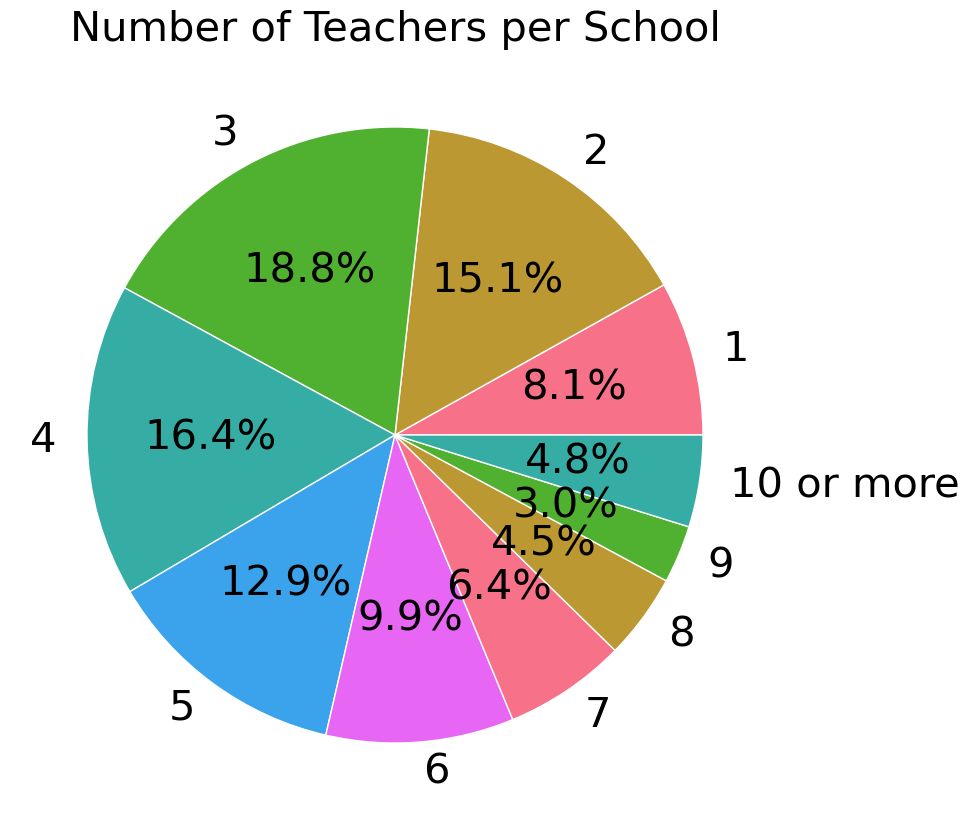

In [30]:
plt.figure(figsize=(10,10))

size=1
colors=sns.color_palette('husl')[:teacher_per_school.CNTLNUM_T.value_counts().index.nunique()]
plt.pie(teacher_per_school3.SCHCNTL, labels=teacher_per_school3.CNTLNUM_T, colors=colors, 
        radius=1, autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'),
       textprops={'fontsize': 30})
# colors=sns.color_palette('deep')[0:2]
# plt.pie(num_teachers.Num_Teachers, labels=num_teachers.index.to_frame()[1].values, colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Number of Teachers per School', size=30)
plt.show()

Aggregating the dataframe per school

In [31]:
agg={'label_Current': 'sum', 'CNTLNUM_T': 'count', 'CNTLNUM_P': 'nunique', 'vacnc_STEM': 'max', 'region_Northeast': 'max', 'region_West': 'max', 'race_T_White': 'mean', 'race_T_Black': 'mean', 'race_T_Hispanic': 'mean', 'gender_T_Female': 'mean', 'summer_teaching': 'mean', 'nonteaching_job': 'mean', 'nonschool_job': 'mean', 'extracur_act': 'mean', 'merit_pay': 'mean', 'union_member': 'mean', 'BA_major_STEM': 'mean', 'MA_major_STEM': 'mean', 'field_cert_Regular': 'mean', 'deg_T_MA': 'mean', 'pd_time': 'mean', 'pd_finance': 'mean', 'remain_teaching': 'mean', 'field_STEM': 'mean', 'hrs_taught_STEM': 'mean', 'public_ft_exp': 'mean', 'public_pt_exp': 'mean', 'private_ft_exp': 'mean', 'field_same': 'mean', 'full_time': 'mean', 'teaches_7to12': 'mean', 'new_teacher': 'mean', 'minority_students': 'max', 'FRPL_eligible_k12': 'max', 'stu_tch_ratio': 'mean', 'sch_type': 'max', 'level_Elementary': 'max', 'urbanicity': 'max', 'title_I_receive': 'max', 'age_P': 'max', 'salary_P': 'max', 'yrs_P_this_sch': 'max', 'yrs_P_oth_schls': 'max', 'yrs_tch_before_P': 'max', 'yrs_tch_since_P': 'max', 'deg_highest_P': 'max', 'race_P_Black': 'max', 'race_P_White': 'max', 'race_P_Hispanic': 'max', 'gender_P_Female': 'max', 'incen_pay': 'max', 'incen_NonSTEM': 'max'}


In [32]:
df_sch=df_all.groupby(['SCHCNTL'], as_index=False).agg(agg)
df_sch.rename(columns={'CNTLNUM_T': 'NUM_T', 'CNTLNUM_P': 'NUM_P',
                      'label_Current': 'NUM_T_Pred'}, inplace=True)
print(df_sch.shape)

print('Number of schools', df_sch.SCHCNTL.nunique())
print('Number of teachers', df_sch.NUM_T.sum())
print('Number of principals', df_sch.NUM_P.sum())

KeyError: "Column(s) ['BA_major_STEM', 'MA_major_STEM', 'deg_highest_P', 'field_STEM', 'field_cert_Regular', 'full_time', 'gender_P_Female', 'gender_T_Female', 'hrs_taught_STEM', 'incen_NonSTEM', 'incen_pay', 'level_Elementary', 'pd_finance', 'pd_time', 'race_P_Black', 'race_P_Hispanic', 'race_P_White', 'race_T_Black', 'race_T_Hispanic', 'race_T_White', 'region_Northeast', 'region_West', 'teaches_7to12', 'title_I_receive', 'vacnc_STEM'] do not exist"

### Analysis ###

**Public Schools**

In [ ]:
col='vacnc_STEM'
count=1
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'STEM' if x==1 else 'Non-STEM')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (1): vacnc_STEM


,vacnc_STEM,NUM_T_Pred,label,total,ratio
0,Non-STEM,21753,Current,24090,90.298879
1,Non-STEM,2337,Former,24090,9.701121
2,STEM,7993,Current,9108,87.758015
3,STEM,1115,Former,9108,12.241985


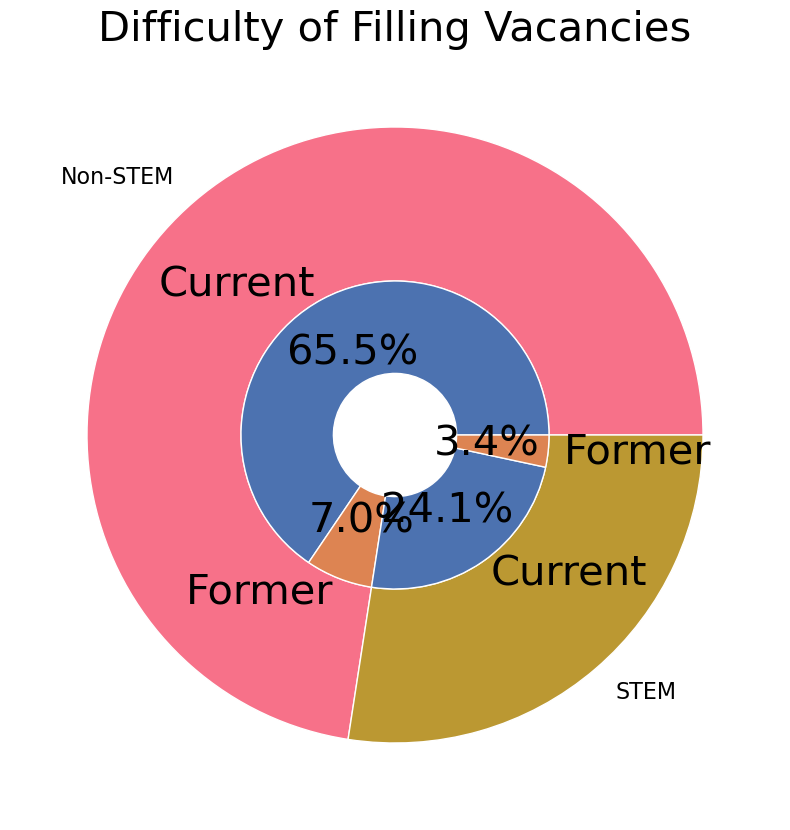

In [ ]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Difficulty of Filling Vacancies', size=30)

plt.show()

In [ ]:
col='region_West'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'West' if x==1 else 'Other Regions')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (2): region_West


,region_West,NUM_T_Pred,label,total,ratio
0,Other Regions,22193,Current,24726,89.755723
1,Other Regions,2533,Former,24726,10.244277
2,West,7553,Current,8472,89.152502
3,West,919,Former,8472,10.847498


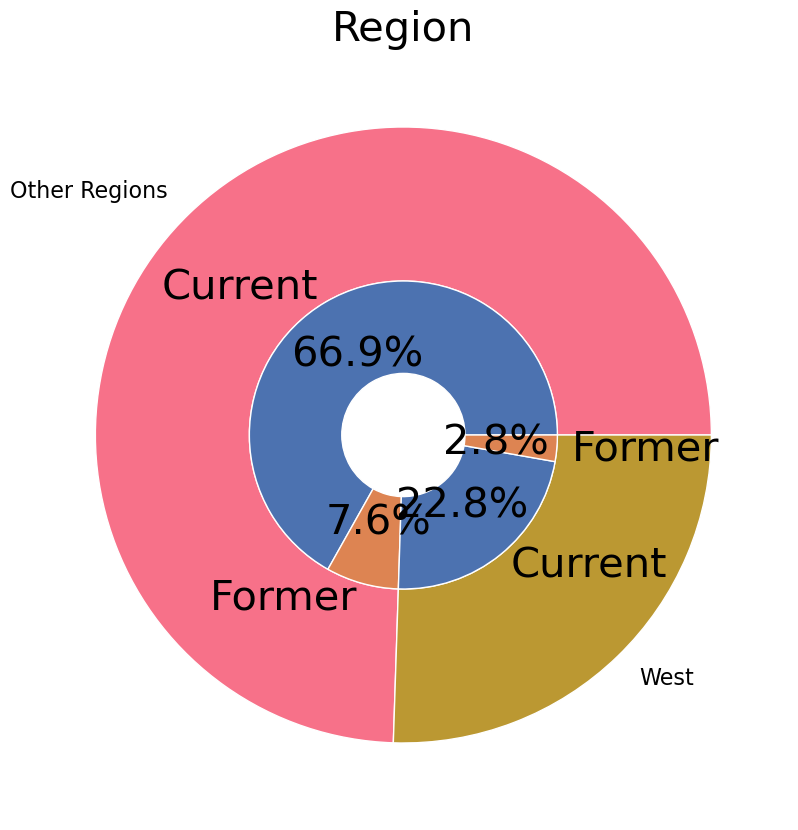

In [ ]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Region', size=30)

plt.show()

In [ ]:
col='level_Elementary'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Elementary' if x==1 else 'Secondary/Combined')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (3): level_Elementary


,level_Elementary,NUM_T_Pred,label,total,ratio
0,Elementary,11180,Current,11655,95.924496
1,Elementary,475,Former,11655,4.075504
2,Secondary/Combined,18566,Current,21543,86.181126
3,Secondary/Combined,2977,Former,21543,13.818874


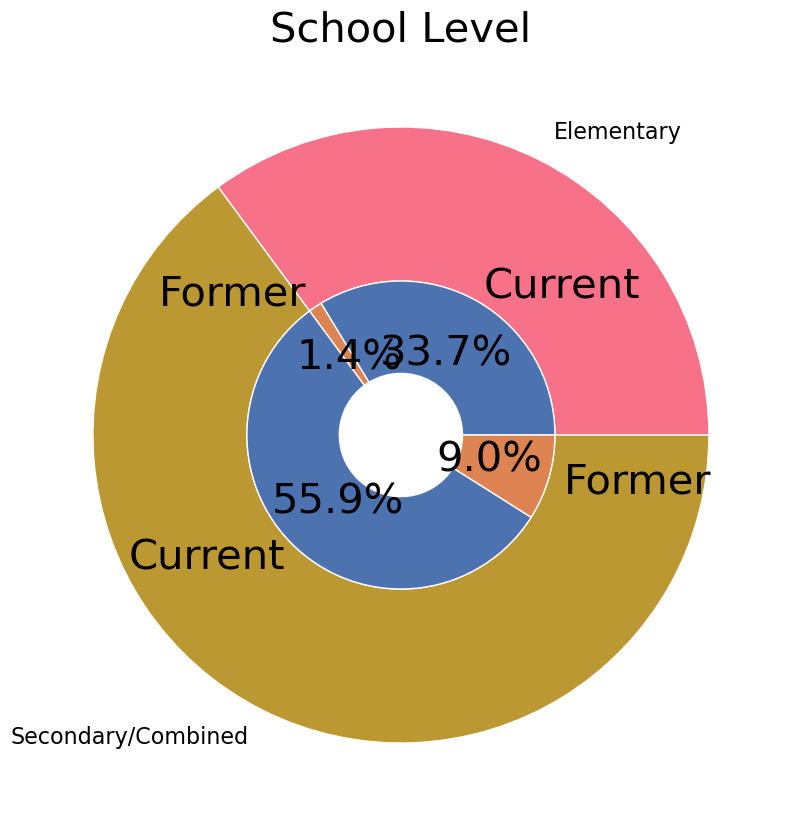

In [ ]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('School Level', size=30)

plt.show()

In [ ]:
col='incen_pay'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Yes' if x==1 else 'No')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (4): incen_pay


,incen_pay,NUM_T_Pred,label,total,ratio
0,No,25131,Current,28054,89.580808
1,No,2923,Former,28054,10.419192
2,Yes,4615,Current,5144,89.716174
3,Yes,529,Former,5144,10.283826


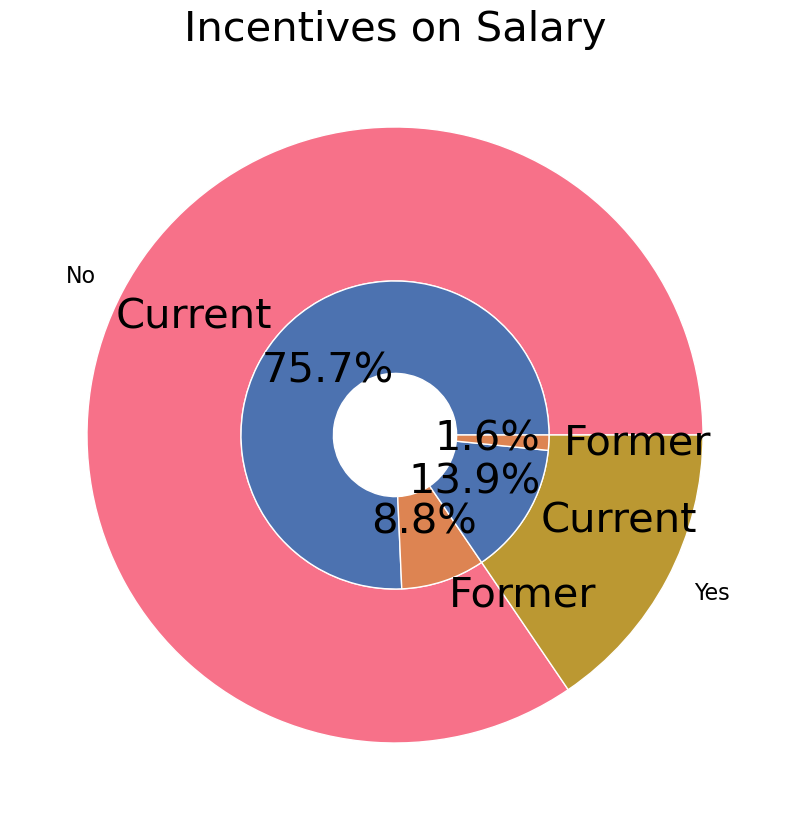

In [ ]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Incentives on Salary', size=30)

plt.show()

In [ ]:
col='incen_NonSTEM'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Non-STEM' if x==1 else 'No')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (5): incen_NonSTEM


,incen_NonSTEM,NUM_T_Pred,label,total,ratio
0,No,27119,Current,30297,89.510513
1,No,3178,Former,30297,10.489487
2,Non-STEM,2627,Current,2901,90.554981
3,Non-STEM,274,Former,2901,9.445019


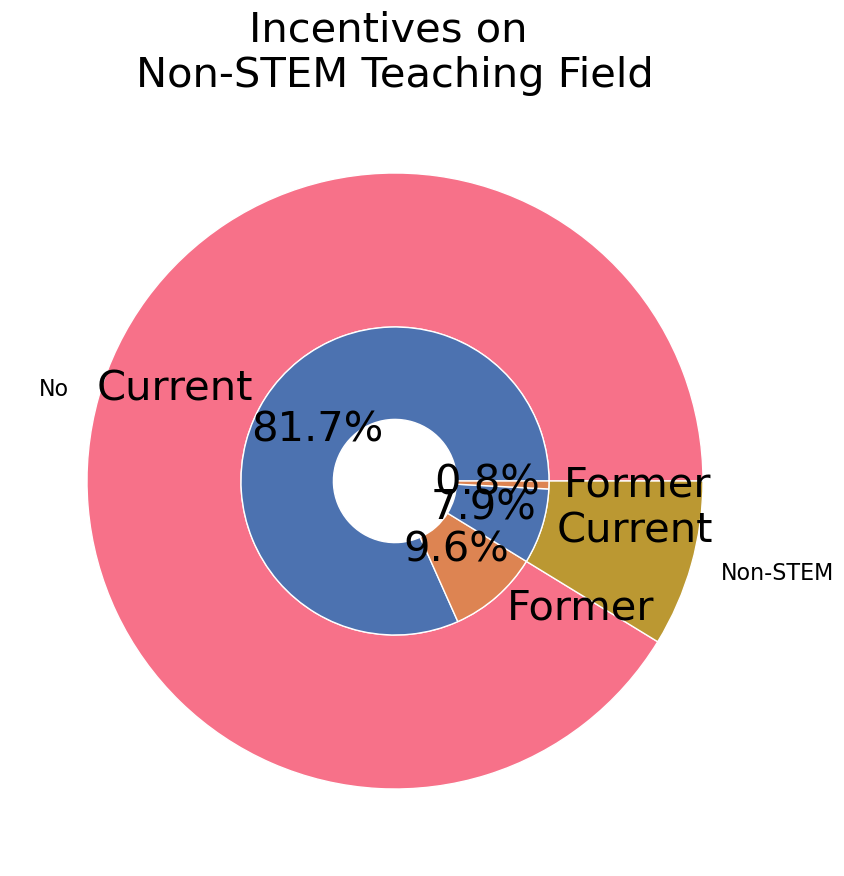

In [ ]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Incentives on \nNon-STEM Teaching Field', size=30)

plt.show()

In [ ]:
category={1: 'Large/mid size\ncentral city', 2: 'Urban fringe of \nlarge/mid-size city', 3: 'Small town/Rural'}

col='urbanicity'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (6): urbanicity


,urbanicity,NUM_T_Pred,label,total,ratio
0,Large/mid size\ncentral city,6568,Current,7301,89.960279
1,Large/mid size\ncentral city,733,Former,7301,10.039721
2,Small town/Rural,11457,Current,12930,88.607889
3,Small town/Rural,1473,Former,12930,11.392111
4,Urban fringe of \nlarge/mid-size city,11721,Current,12967,90.390993
5,Urban fringe of \nlarge/mid-size city,1246,Former,12967,9.609007


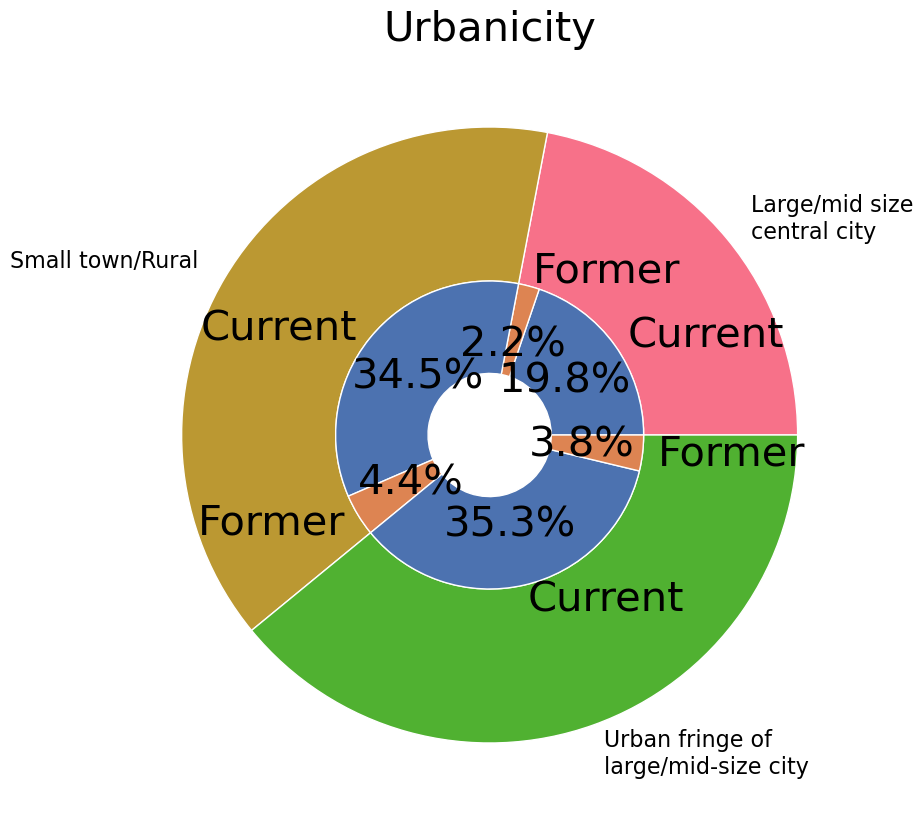

In [ ]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Urbanicity', size=30)

plt.show()

In [ ]:
col='title_I_receive'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']

table[col]=table[col].apply(lambda x: 'Yes' if x==1 else 'No')
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (7): title_I_receive


,title_I_receive,NUM_T_Pred,label,total,ratio
0,No,17185,Current,19449,88.359299
1,No,2264,Former,19449,11.640701
2,Yes,12561,Current,13749,91.359372
3,Yes,1188,Former,13749,8.640628


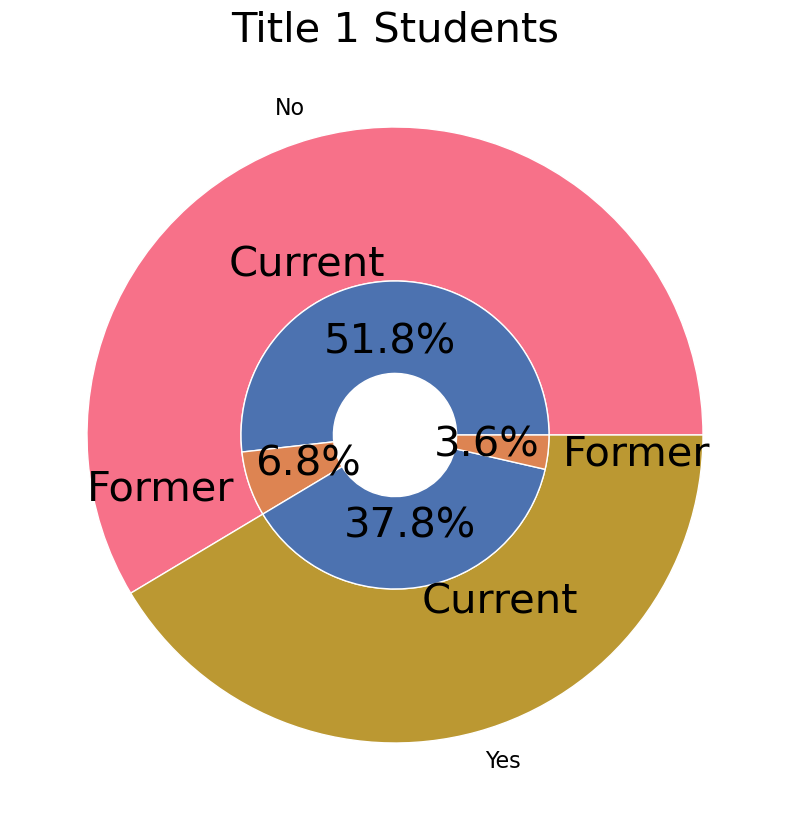

In [ ]:
plt.figure(figsize=(10,10))
size=0.5

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Title 1 Students', size=30)

plt.show()

**Public Principal**

In [ ]:
category={1: '< 40', 2: '40-44', 3: '45-49', 4: '50-54', 5: '>= 55'}

col='age_P'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (8): age_P


,age_P,NUM_T_Pred,label,total,ratio
0,40-44,3538.0,Current,3961.0,89.320879
1,40-44,423.0,Former,3961.0,10.679121
2,45-49,7238.0,Current,7980.0,90.701754
3,45-49,742.0,Former,7980.0,9.298246
4,50-54,9850.0,Current,10962.0,89.855866
5,50-54,1112.0,Former,10962.0,10.144134
6,< 40,2938.0,Current,3242.0,90.623072
7,< 40,304.0,Former,3242.0,9.376928
8,>= 55,6182.0,Current,7053.0,87.650645
9,>= 55,871.0,Former,7053.0,12.349355


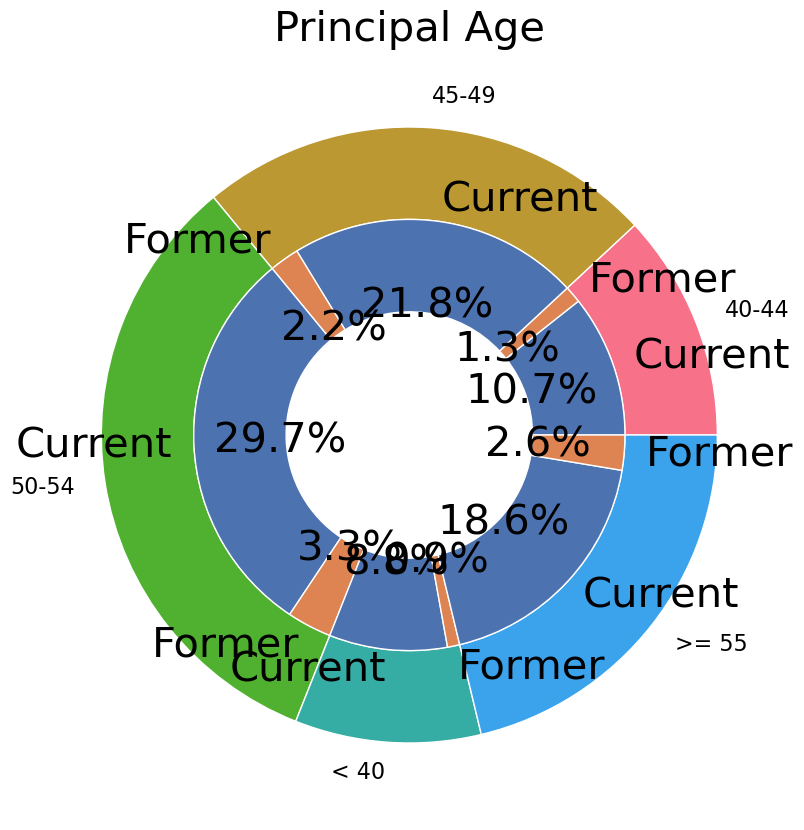

In [ ]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Age', size=30)

plt.show()

In [ ]:
category={1: 'Less than $49,000', 2: '\$49,000-$59,999', 3: '\$60,000-$69,999', 4: '\$70,000-$79,999', 5: '\$80,000-$89,999', 6: '\$90,000 or more'}

col='salary_P'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (9): salary_P


,salary_P,NUM_T_Pred,label,total,ratio
0,"Less than $49,000",2987.0,Current,3340.0,89.431138
1,"Less than $49,000",353.0,Former,3340.0,10.568862
2,"\$49,000-$59,999",6788.0,Current,7583.0,89.516023
3,"\$49,000-$59,999",795.0,Former,7583.0,10.483977
4,"\$60,000-$69,999",8116.0,Current,8962.0,90.560143
5,"\$60,000-$69,999",846.0,Former,8962.0,9.439857
6,"\$70,000-$79,999",6079.0,Current,6777.0,89.700457
7,"\$70,000-$79,999",698.0,Former,6777.0,10.299543
8,"\$80,000-$89,999",3580.0,Current,4038.0,88.657751
9,"\$80,000-$89,999",458.0,Former,4038.0,11.342249


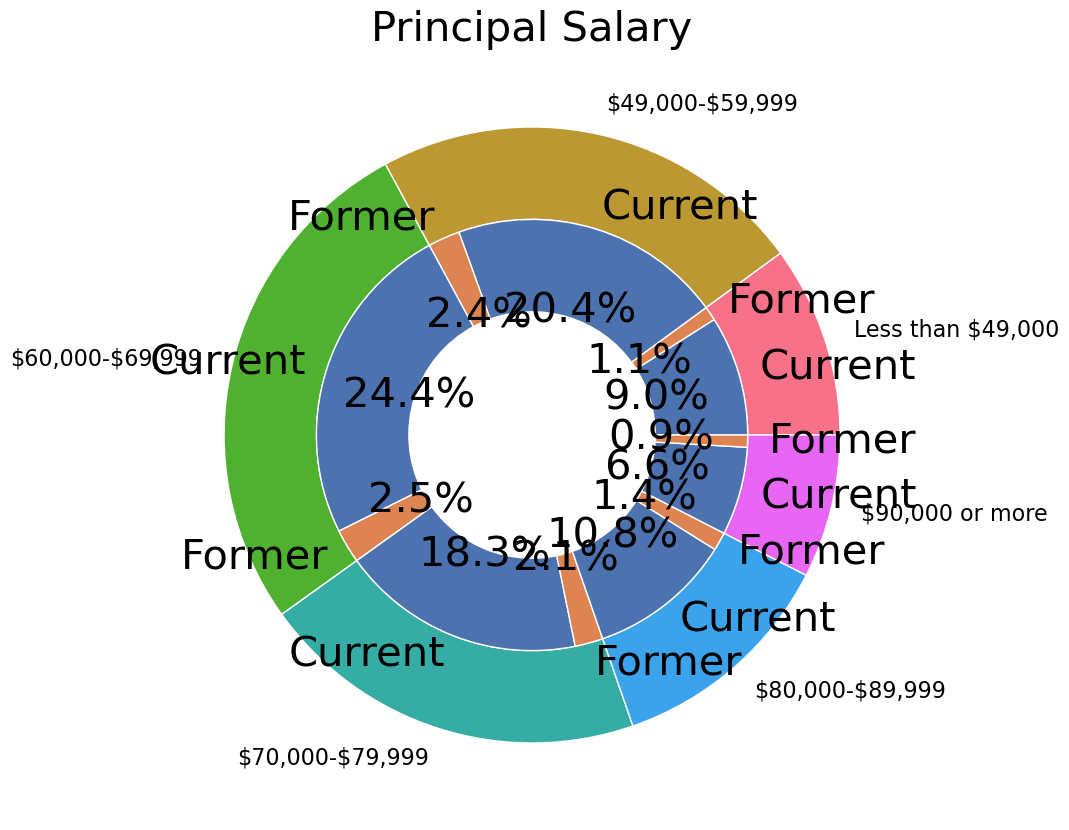

In [ ]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Salary', size=30)

plt.show()

In [ ]:
category={1: 'Associate', 2: 'Bachelors', 3: 'Masters', 
          4: 'Education\nSpecialist', 5: 'Doctorate'}

col='deg_highest_P'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].map(category)
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (10): deg_highest_P


,deg_highest_P,NUM_T_Pred,label,total,ratio
0,Associate,7.0,Current,9.0,77.777778
1,Associate,2.0,Former,9.0,22.222222
2,Bachelors,370.0,Current,415.0,89.156627
3,Bachelors,45.0,Former,415.0,10.843373
4,Doctorate,3267.0,Current,3637.0,89.826780
5,Doctorate,370.0,Former,3637.0,10.173220
6,Education\nSpecialist,9963.0,Current,11126.0,89.547007
7,Education\nSpecialist,1163.0,Former,11126.0,10.452993
8,Masters,16139.0,Current,18011.0,89.606352
9,Masters,1872.0,Former,18011.0,10.393648


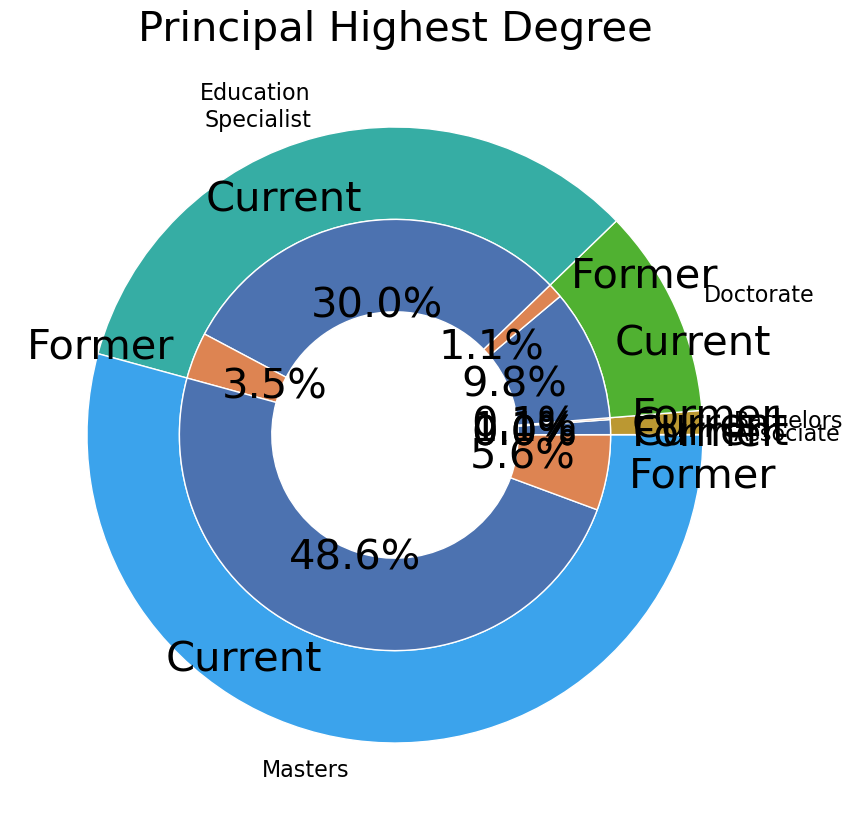

In [ ]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Highest Degree', size=30)

plt.show()

In [ ]:
col='race_P_Black'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Black' if x==1 else 'Non-Black')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (11): race_P_Black


,race_P_Black,NUM_T_Pred,label,total,ratio
0,Black,2515,Current,2815,89.342806
1,Black,300,Former,2815,10.657194
2,Non-Black,27231,Current,30383,89.625778
3,Non-Black,3152,Former,30383,10.374222


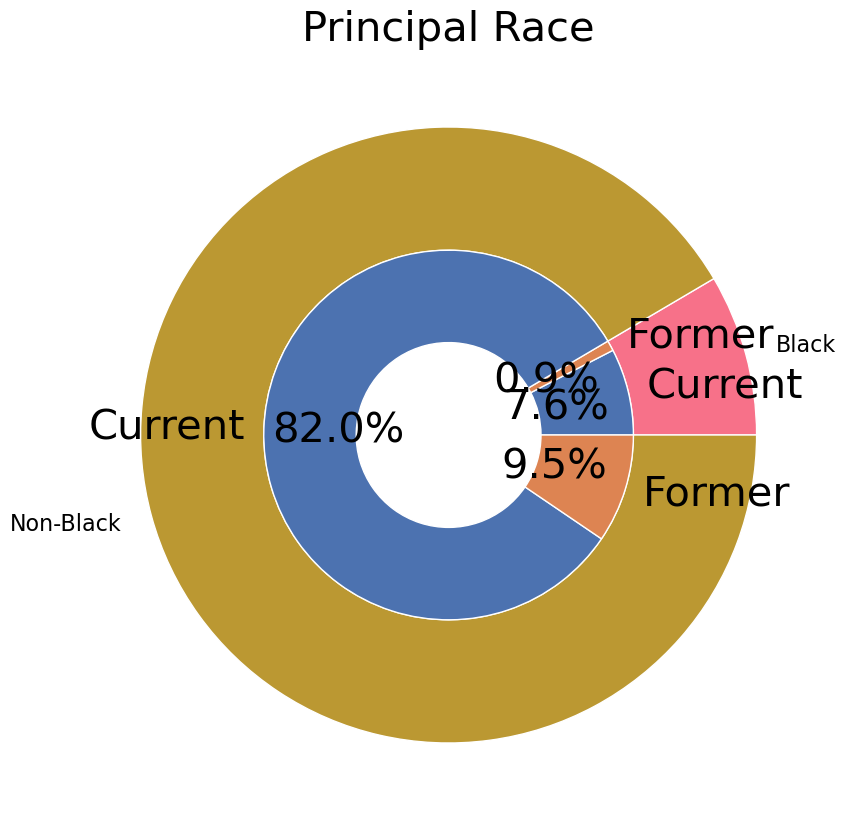

In [ ]:
plt.figure(figsize=(10,10))
size=0.4

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Race', size=30)

plt.show()

In [ ]:
col='race_P_White'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'White' if x==1 else 'Non-White')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (12): race_P_White


,race_P_White,NUM_T_Pred,label,total,ratio
0,Non-White,4691,Current,5188,90.420200
1,Non-White,497,Former,5188,9.579800
2,White,25055,Current,28010,89.450196
3,White,2955,Former,28010,10.549804


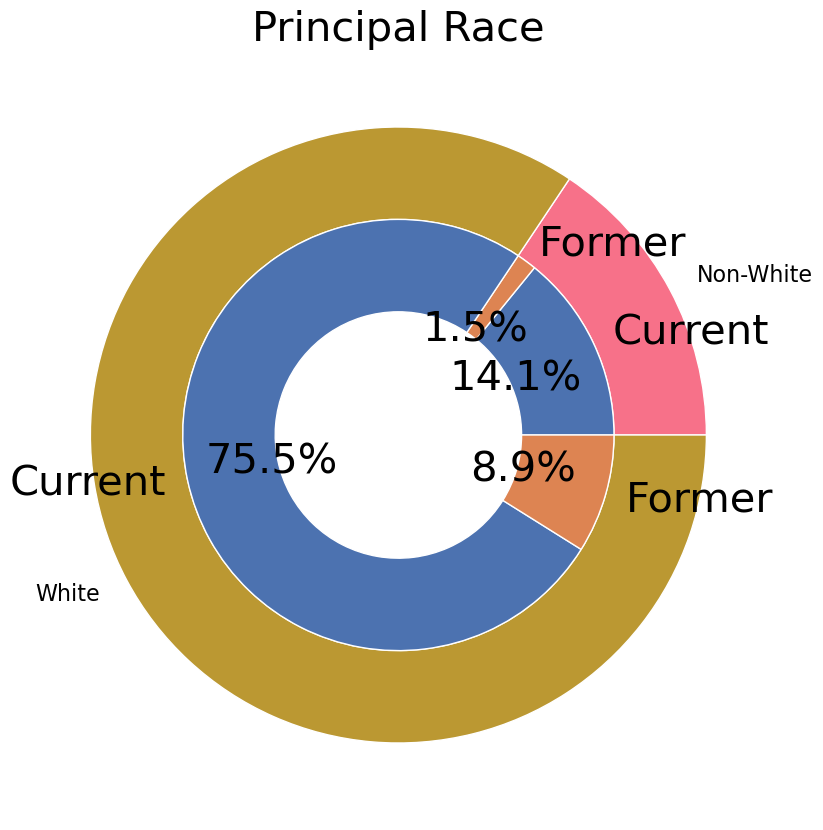

In [ ]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Race', size=30)

plt.show()

In [ ]:
col='race_P_Hispanic'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Hispanic' if x==1 else 'Non-Hispanic')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (13): race_P_Hispanic


,race_P_Hispanic,NUM_T_Pred,label,total,ratio
0,Hispanic,1257,Current,1368,91.885965
1,Hispanic,111,Former,1368,8.114035
2,Non-Hispanic,28489,Current,31830,89.503613
3,Non-Hispanic,3341,Former,31830,10.496387


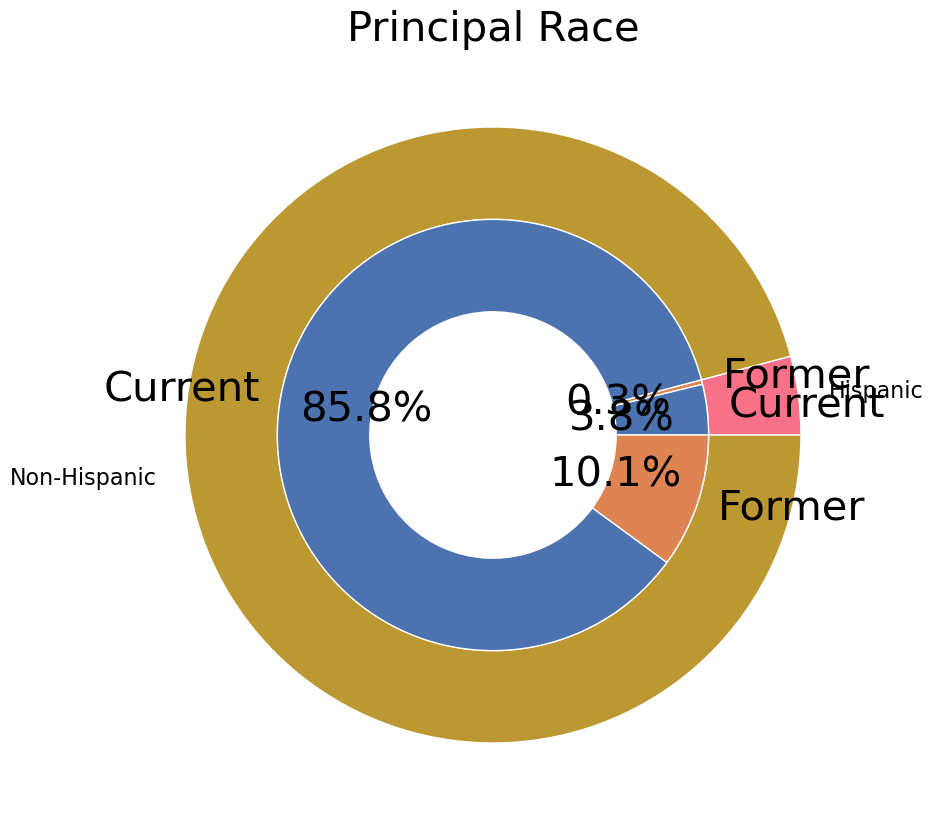

In [ ]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Race', size=30)

plt.show()

In [ ]:
col='gender_P_Female'
print('Figure ('+str(count)+'): '+col)
count+=1

table=df_sch.groupby([col], as_index=False).agg({'NUM_T': 'sum', 'NUM_T_Pred': 'sum'})
table['NUM_Former']=table.apply(lambda x: x.NUM_T-x.NUM_T_Pred, axis=1)
temp1=pd.DataFrame(table[[col, 'NUM_T_Pred']])
temp1['label']='Current'
temp2=pd.DataFrame(table[[col, 'NUM_Former']])
temp2.columns=[col, 'NUM_T_Pred']
temp2['label']='Former'
table=pd.concat([temp1, temp2], ignore_index=True)    
table['total']=table.groupby(col).transform(lambda x: x.sum())['NUM_T_Pred']
table['ratio']=table.apply(lambda x: x.NUM_T_Pred/x.total*100, axis=1)

table[col]=table[col].apply(lambda x: 'Female' if x==1 else 'Male')
table.sort_values(by=[col, 'label'], inplace=True, ignore_index=True)
table

Figure (14): gender_P_Female


,gender_P_Female,NUM_T_Pred,label,total,ratio
0,Female,9276,Current,10076,92.060341
1,Female,800,Former,10076,7.939659
2,Male,20470,Current,23122,88.530404
3,Male,2652,Former,23122,11.469596


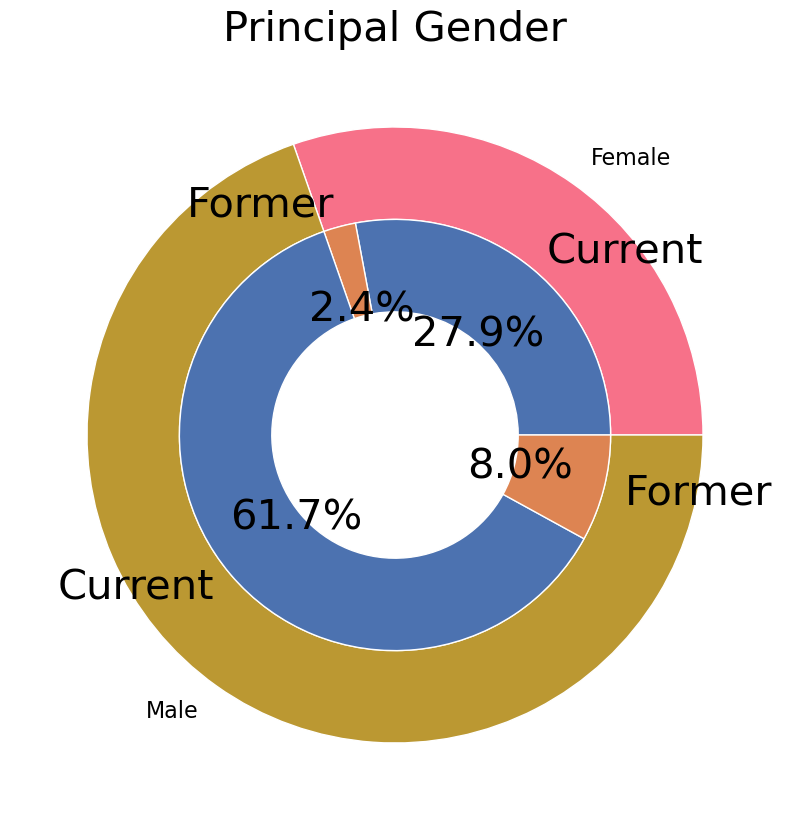

In [ ]:
plt.figure(figsize=(10,10))
size=0.3

colors=sns.color_palette('husl')[:table[col].nunique()]
plt.pie(table.total.unique().tolist(), labels=table[col].unique().tolist(), 
        colors=colors, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
        textprops={'fontsize': 16})
colors=sns.color_palette('deep')[0:2]
plt.pie(table.NUM_T_Pred.tolist(), labels=table.label.tolist(), 
        colors=colors, radius=1-size, autopct='%1.1f%%', wedgeprops=dict(width=0.3, edgecolor='w'), 
        textprops={'fontsize': 30})

plt.title('Principal Gender', size=30)

plt.show()

In [ ]:
df_sch

,SCHCNTL,NUM_T_Pred,NUM_T,NUM_P,vacnc_STEM,region_Northeast,region_West,race_T_White,race_T_Black,race_T_Hispanic,...,yrs_P_oth_schls,yrs_tch_before_P,yrs_tch_since_P,deg_highest_P,race_P_Black,race_P_White,race_P_Hispanic,gender_P_Female,incen_pay,incen_NonSTEM
0,100001,0,1,1,0,0,1,1.000000,0.0,0.0,...,9.0,14.0,5.0,3.0,0,1,0,0,0,0
1,100002,5,5,1,0,0,0,0.800000,0.0,0.2,...,0.0,11.0,0.0,3.0,0,1,0,1,0,0
2,100004,8,8,1,0,0,0,1.000000,0.0,0.0,...,16.0,5.0,0.0,5.0,0,1,0,0,0,0
3,100005,4,4,1,0,0,1,0.750000,0.0,0.0,...,11.0,4.0,14.0,3.0,0,1,0,0,0,0
4,100006,4,6,1,0,0,1,0.833333,0.0,0.0,...,10.0,8.0,0.0,3.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,112316,2,2,1,0,0,1,1.000000,0.0,0.0,...,8.0,3.0,0.0,5.0,0,1,0,1,1,0
7424,112319,4,5,1,0,0,0,0.800000,0.2,0.0,...,1.0,20.0,0.0,3.0,1,0,0,0,0,0
7425,112320,7,9,1,1,0,0,1.000000,0.0,0.0,...,0.0,20.0,0.0,5.0,0,1,0,0,0,0
7426,112323,2,2,1,0,0,0,1.000000,0.0,0.0,...,0.0,10.0,0.0,4.0,0,1,0,1,0,0
